<img src="./lecture_image/00_title.png">

# 객체 추적

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[14차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>        
○ 객체 추적방법에 대해 학습한다. <br><br>
○ 배경 차분방법에 대해 학습한다. 
</font></td></tr>   
</table>

## MeanShift 

- 분포되어 있는 데이터에서 가장 밀집되어 있는 부분을 찾아내기 위한 기법
- 알고리즘
  - (1) 임의의 원을 데이터 공간에 그림 (Region of interest)
  - (2) 원 안에 포함되어 있는 점들을 다 파악하여 x좌표, y좌표의 평균을 구함 (Center of mass)
  - (3) 평균의 x, y좌표를 표시하고 그 좌표를 원의 중심으로 원을 움직임 (Mean Shift vector)
  - (4) 이 작업을 반복 → 가우시안 분포의 중심으로 이동
  
- 영상에서 Mean Shift 방법은 평균 이동 알고리즘을 이용하여 관심 영역을 추적

<img src="./lecture_image/14_meanshift.png" width=50%>

<img src="./lecture_image/14_meanshift2.gif" width=40%>

<center><font size=1>참고 : https://techlog.gurucat.net/146</font></center>  

### 초기 관심영역 선택

- <font color=red>roi = cv2.selectROI(title, img, )</font>
  - 마우스로 초기 관심영역 선택
  - 선택한 영역의 좌상좌표 (x, y), 가로세로크기(w, h) 값을 반환
  
  
- <font color=red>roi = cv2.selectROIs(title, img)</font>
  - 마우스로 초기 관심영역 여러 개 선택
  - 선택한 영역들의 좌상좌표 (x, y), 가로세로크기(w, h) 값을 반환  

In [2]:
#실습
import cv2
import numpy as np

img= cv2.imread("./image/lenna.png")

#이미지를 띄우고 사용자에게 원하는 이미지의 부분을 선택하도록함
# 사용자가 마우스로 이미지를 선택하면 (x,y,w,h)를 반환

roi=cv2.selectROI("Select ROI",img)

print(roi)

cv2.waitKey(0)
cv2.destroyAllWindows()

(62, 64, 363, 379)


In [ ]:
#실습
import cv2
import numpy as np

img= cv2.imread("./image/lenna.png")

#이미지 선택 -> 스페이스바 -> 이미지 선택 ->..ESC 키를 누름
rois=cv2.selectROIs("Select ROI",img)

#창번호
co=0

for roi in rois:
    print(roi)
    
    co=co+1
    
    #w,h를 좌표값으로 변경해서 ROI 영역을 자름 
    img2=img[roi[1]:roi[1]+roi[3],roi[0]:roi[0]+roi[2]]
    
    #ROI를 각 창에 출력
    # 창의 이름을 설정 
    cv2.namedWindow(f"roi_{co}")
    # 해당 창에 자른 이미지를 출력
    cv2.imshow(f"roi_{co}",img2)

cv2.waitKey(0)
cv2.destroyAllWindows()


[118  73 335 400]
[118  73 335 400]
[ 90 149   1   4]
[ 90 149  18  27]
[ 90 149  37  50]
[ 90 149  51  67]
[ 90 149  64  82]
[ 90 149  67  86]
[ 90 149  68  87]
[ 90 149  68  88]
[ 90 149  68  88]
[ 90 149  68  88]
[ 90 149  68  88]
[ 90 149  68  88]
[ 90 149  68  88]
[ 90 149  68  88]
[ 90 149  78 104]
[ 90 149 100 127]
[ 90 149 125 149]
[ 90 149 178 202]
[ 90 149 216 234]
[ 90 149 228 246]
[ 90 149 237 254]
[ 90 149 238 256]
[ 90 149 241 262]
[ 90 149 247 272]
[ 90 149 249 275]
[ 90 149 252 280]
[ 90 149 255 285]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 255 286]
[ 90 149 2

### 동영상에서 객체 추적

- 동작 순서
  - 영상에서 추적할 대상을 설정한 후 HSV 색상공간의 Hue(색상) 히스토그램을 계산
  - 전체 영상에 대해 히스토그램을 계산 후 역투영 처리
  - 역투영 처리된 영상에서 MeanShilft로 추적
  
  
- 역투영 (BackProject) : 전체 영상의 색상 정보와 대상 객체의 색상 정보의 비율을 0~255 구간 내로 정규화

   - <font color=red>backproj = cv2.calcBackProject([hsv이미지], [채널], 히스토그램, 채널의 범위, scale)</font>
     - HSV 색상 영역에서 해당 채널 (H, S, V) 히스토그램에 대한 역투영
     - 히스토그램으로 마스크를 구하고 실제 영상과 선택한 이미지를 AND 연산하여 원하는 색부분만 추출
     - scale : 출력 역투영 행렬에 추가적으로 곱할 값


- <font color=red>ret, win = cv2.meanShift(backproj, window, criteria)</font>
  - backproj : 관심 객체에 대한 히스토그램 역투영 영상 (확률 영상)
  - window: 초기 검색 영역 윈도우 & 결과 영역 반환
  - criteria: 알고리즘 종료 기준 (type, maxCount, epsilon)
   - cv2.TERM_CRITERIA_EPS : 주어진 정확도 (이동 크기)에 도달하면 반복 중단
   - cv2.TERM_CRITERIA_COUNT : 반복 횟수에 도달하면 반복 중단
   - (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1) ➔ 최대 10번 반복하며, 정확도가 1이하이면 (즉, 이동 크기가 1픽셀보다 작으면) 종료.
    
  - ret : 회전된 사각형 정보를 반환 - (x, y, width, height)
  - win : 회전이 안된 사각형 정보를 반환    

In [40]:
#실습

## CamShift 
- MeanShift의 문제점
  - 탐색윈도우가 작을 때는 Local minimum 에 빠져서 더 이상 추적이 불가능
  - 영상속의 물체가 커지거나 작아져도 ROI 크기가 일정
  - 색상 히스토그램을 사용하는 경우 조도변화나 잡음에 민감<br>
 

- CamShift 알고리즘 - MeanShift의 문제점을 보완
  - (1) 관심영역 (ROI)가 주어지면 HSV 색 모델의 Hue값으로 변환
  - (2) ROI의 1차원 히스토그램을 계산하고 추적 모델로 사용
  - (3) 우선 평균 이동 알고리즘으로 이동 위치 계산
  - (4) MeanShift가 수렴했다고 판단되면 이 위치에서 검색 윈도우의 윈도우 크기를 약간씩 키움 (기본적으로 10픽셀씩 키움)
  - (5) 키운 윈도우 안에서 객체의 위치를 계산
  - (6) 특징 공간을 가장 잘 표현하는 타원을 만들어서 타원의 크기만큼 윈도우 크기를 키움
  - (7) 객체가 작아졌으면 타원의 크기가 작아짐
  - (8) 검색 윈도우도 타원의 크기에 맞추어 작아짐
  - (9) 새로운 크기의 윈도우를 이용하여 다시 평균 이동 수행
  
  <img src="./lecture_image/14_CAMshift.png" width=70%>
  
<center><font size=1>참고 : https://www.researchgate.net/publication/264174083</font></center>  

### 동영상에서 객체 추적

- <font color=red>ret, win = cv2.CamShift(probImage, window, criteria)</font>
  - probImage: 관심 객체에 대한 히스토그램 역투영 영상 (확률 영상)
  - window: 초기 검색 영역 윈도우 & 결과 영역 반환
  - criteria: 알고리즘 종료 기준 (type, maxCount, epsilon)
   - cv2.TERM_CRITERIA_EPS : 주어진 정확도 (이동 크기)에 도달하면 반복 중단
   - cv2.TERM_CRITERIA_COUNT : 반복 횟수에 도달하면 반복 중단
   - (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1) ➔ 최대 10번 반복하며, 정확도가 1이하이면 (즉, 이동 크기가 1픽셀보다 작으면) 종료.
    
  - ret : 회전된 사각형 정보를 반환 - (x, y, width, height)
  - win : 회전이 안된 사각형 정보를 반환       

In [2]:
#실습
# 실패 코드 

import cv2

cap=cv2.VideoCapture("./image/car.mp4")

init=0 # 초기위치 설정 유무 

# 종료조건
term_crit= (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

# 영상이 열렸다면 
while cap.isOpened():
    ret, frame= cap.read()
    
    if not ret:
        break
        
    img_draw=frame.copy()
    
    # 만약 초기 시작 위치를 설정하지 않았다면 
    if init==0 :
        # 텍스트 출력 
        cv2.putText(img_draw,"Press set ROI",(10,30),
                   cv2.FONT_HERSHEY_SIMPLEX,0.75,(0,0,255),2, cv2.LINE_AA)
        
    else:
        frame_hsv= cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        
        #투영 이미지 생성 
        backproj = cv2. calcBackProject([frame_hsv],[0,1],hist, 
                                        [0,179,0,255], 1)
        
        #Camshif를 이용해서 추적 
        ret2, rc= cv2.CamShift(backproj, rc, term_crit)
        
        # 추적된 위치 표시
        cv2. rectangle(img_draw, rc[0],rc[1] (0,0,255), 2)
        
    cv2.imshow("Tracking",img_draw)
        
    key=cv2.waitKey(33)
    
    # 스페이스를 누른경우 , 아직 초기 위치를 지정하지 않는경우 
    if key==ord(" ")and init==0:
    
        # 마우스로 추적할 위치를 지정 
        x,y,w,h=cv2.selectROI("Tracking",frame, False)
        
        # 초기 위치를 마우스로 선택 했다면
        if w and h:
            rc=(x,y,w,h)
            
            #선택한 영역을 HSV로 변환
            roi= frame[y:y+h, x:x+w]
            roi_hsb=cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)
            
            hist=cv2.calcHist([roi_hsv],[0,1],None, [180,255],[0,179,0,255])
            
            
            # 해당 값들을 최소값을 0으로 최대값을 1로 해서 정규화(역투영)
            cv2.normalize(hist, hist, 0,255, cv2.NORM_MINMAX)
            
            init=0
            
    elif key==49:
        break
        
cap.release()
cv2.destroyAllWindows()


NameError: name 'roi_hsv' is not defined

In [1]:
# 실패 코드 

import cv2
init = 0
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)
cap = cv2.VideoCapture('./images/car.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('비디오 읽기 실패')
        break
    img_draw = frame.copy()
    # 트랙커가 생성 안된 경우 텍스트를 출력
    if init == 0 :
        cv2.putText(img_draw, "Press the Spacebar to set ROI",
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
                    (0, 0, 255), 2, cv2.LINE_AA)
    else:
        frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # HSV 색상 영역에서 색상(Heu), 채도(S) 히스토그램에 대한 역투영
        backproj = cv2.calcBackProject([frame_hsv], [0, 1], hist,
                                       [0, 180, 0, 256], 1)
        # camshift 수행
        ret2, rc = cv2.CamShift(backproj, rc, term_crit)
        # 추적 결과 화면 출력
        cv2.rectangle(img_draw, rc[0],rc[1], (0, 0, 255), 2)
    cv2.imshow("Tracking", img_draw)
    key = cv2.waitKey(33)
    # 스페이스 바를 누른 경우
    if key == ord(' ') and init == 0:
        # 초기 객체 위치 (마우스로 관심영역) 선택 (x, y, w, h 값을 반환)
        x, y, w, h = cv2.selectROI("Tracking", frame, False)
        # 마우스로 관심영역을 선택했다면 (w와 h값이 있다면)
        if w and h:
            # 관심 영역의 크기를 저장
            rc = (x, y, w, h)
            # 선택한 영역을 HSV로 변환
            roi = frame[y:y+h, x:x+w]
            roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
            # HSV 색상공간에서 색상(Hue)와 채도(S)의 히스토그램 계산
            hist = cv2.calcHist([roi_hsv], [0, 1], None,
                                [90, 128], [0, 180, 0, 256])
            # 역투영
            cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
            init = 1
    elif key == 49 :
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
# 반만 성공한 코드 
# 수정하고 분석할것 
import cv2
init = 0
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)
cap = cv2.VideoCapture('./image/car.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('비디오 읽기 실패')
        break
    img_draw = frame.copy()
    # 트랙커가 생성 안된 경우 텍스트를 출력
    if init == 0 :
        cv2.putText(img_draw, "Press the Spacebar to set ROI",
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
                    (0, 0, 255), 2, cv2.LINE_AA)
    else:
        frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # HSV 색상 영역에서 색상(Heu), 채도(S) 히스토그램에 대한 역투영
        backproj = cv2.calcBackProject([frame_hsv], [0, 1], hist,
                                       [0, 180, 0, 256], 1)
        # camshift 수행
        ret2, rc = cv2.CamShift(backproj, rc, term_crit)
        # 추적 결과 화면 출력
        cv2.rectangle(img_draw, (rc[0], rc[1]), (rc[2], rc[3]),
                      (0, 0, 255), 2)
    cv2.imshow("Tracking", img_draw)
    key = cv2.waitKey(33)
    # 스페이스 바를 누른 경우
    if key == ord(' ') and init == 0:
        # 초기 객체 위치 (마우스로 관심영역) 선택 (x, y, w, h 값을 반환)
        x, y, w, h = cv2.selectROI("Tracking", frame, False)
        # 마우스로 관심영역을 선택했다면 (w와 h값이 있다면)
        if w and h:
            # 관심 영역의 크기를 저장
            rc = (x, y, w, h)
            # 선택한 영역을 HSV로 변환
            roi = frame[y:y+h, x:x+w]
            roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
            # HSV 색상공간에서 색상(Hue)와 채도(S)의 히스토그램 계산
            hist = cv2.calcHist([roi_hsv], [0, 1], None,
                                [90, 128], [0, 180, 0, 256])
            # 역투영
            cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
            init = 1
    elif key == 49 :
        break
cap.release()
cv2.destroyAllWindows()

## Traker API
- 참고 : https://pyimagesearch.com/2018/07/30/opencv-object-tracking/


- <font color=red>tracker = cv2.TrackerXXX_create() </font>
  - XXX Traker를 생성
  - OpenCV에서 제공하는 Tracker의 종류
    - Boosting : AdaBoost 알고리즘 기반
    - MIL (Multiple Instance Learning) : 정확도 떨어짐
    - KCF (Kernelized Correlation Filters) : MIL보다 속도는 빠르지만 가림 현상은 처리하지 못함
    - CSRT (Channel and Spatial Reliability) : KCF보다 정확하지만 속도 느림 - 가장 우수
    - MedianFlow : 객체의 전방향/역방향을 추적해서 불일치성을 측정, 빠르면 잘 동작하지 않음
    - TLD (Tracking, Learning and Detection) : 가림 현상에 잘 동작하나 잘못 찾는 경우가 많음
    - MOSSE : 내부적으로 그레이 스케일 사용, 정확도는 떨어지지만 속도가 빠름
    - GOTURN : CNN 기반, 추가 모델(가중치 파일)이 필요함
            
            
- <font color=red>isInit = tracker.init(frame, roi)</font>
  - 이전 추적 위치로 추적 위치 초기화


- <font color=red>ok, bbox = tracker.update(frame) </font>   
  - 새로운 프레임에서 추적 위치 찾기

- 히스토 그램 역투영
    - 사용자가 선택한 이미지 영역의 색상 히스토 그램을 분석해서 분석한 결과의 색상분포와 유사한 이미지 영역을 원본 이미지에서 찾아서(히스토그램 역투영) 표시하는것
    
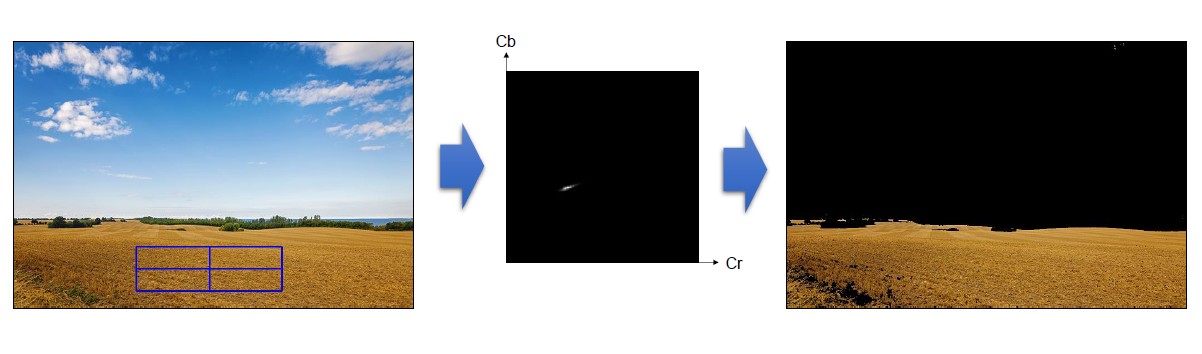

In [5]:
import cv2
# 초기 위치 설정 여부
tracker = None
cap = cv2.VideoCapture('./image/car.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('비디오 읽기 실패')
        break
    img_draw = frame.copy()
    # 트랙커가 생성 안된 경우 텍스트를 출력
    if tracker is None :
        cv2.putText(img_draw, "Press the Spacebar to set ROI",
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
                    (0, 0, 255), 2, cv2.LINE_AA)
    else:
        # 객체 추적 (추적성공여부, 추적좌표를 반환 (x,y,w,h))
        ok, bbox = tracker.update(frame)
        (x, y, w, h) = bbox
        if ok :
           # 추적 결과 화면 출력
           cv2.rectangle(img_draw, (int(x), int(y)), (int(x + w), int(y+h)),
                         (0, 0, 255), 2)
    cv2.imshow("Tracking", img_draw)
    key = cv2.waitKey(33)
    # 스페이스 바를 누른 경우
    if key == ord(' ') :
        # 초기 객체 위치 (마우스로 관심영역) 선택 (x, y, w, h 값을 반환)
        roi = cv2.selectROI("Tracking", frame, False)
        # 마우스로 관심영역을 선택했다면 (w와 h값이 있다면)
        if roi[2] and roi[3]:
            # 트랙커 생성
            tracker = cv2.TrackerMIL_create()
            # 초기위치 설정
            isinit = tracker.init(frame, roi)
    elif key == 49 :
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
import cv2
# 초기 위치 설정 여부
tracker = None
cap = cv2.VideoCapture('./image/video.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('비디오 읽기 실패')
        break
    img_draw = frame.copy()
    # 트랙커가 생성 안된 경우 텍스트를 출력
    if tracker is None :
        cv2.putText(img_draw, "Press the Spacebar to set ROI",
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
                    (0, 0, 255), 2, cv2.LINE_AA)
    else:
        # 객체 추적 (추적성공여부, 추적좌표를 반환 (x,y,w,h))
        ok, bbox = tracker.update(frame)
        (x, y, w, h) = bbox
        if ok :
           # 추적 결과 화면 출력
           cv2.rectangle(img_draw, (int(x), int(y)), (int(x + w), int(y+h)),
                         (0, 0, 255), 2)
    cv2.imshow("Tracking", img_draw)
    key = cv2.waitKey(33)
    # 스페이스 바를 누른 경우
    if key == ord(' ') :
        # 초기 객체 위치 (마우스로 관심영역) 선택 (x, y, w, h 값을 반환)
        roi = cv2.selectROI("Tracking", frame, False)
        # 마우스로 관심영역을 선택했다면 (w와 h값이 있다면)
        if roi[2] and roi[3]:
            # 트랙커 생성
            tracker = cv2.TrackerMIL_create()
            # 초기위치 설정
            isinit = tracker.init(frame, roi)
    elif key == 49 :
        break
cap.release()
cv2.destroyAllWindows()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다른 Tracker를 이용하여 객체 추적을 수행해보자.</font></td></tr> 
    
</table>

# 배경 차분 - MOG 배경 모델 

## OpenCV의 배경 추정 알고리즘

  
  <img src="./lecture_image/mog1.png" width=70%>

## MOG : Mixture of Gaussian, GMM(Gaussian Mixture Model)
- 각 픽셀에 대해 MOG 확률 모델을 설정하여 배경과 전경을 구분하는 방법
  - (1) 영상의 각각의 픽셀 값을 배경 영상으로 정의
  - (2) 미리 정의해둔 배경 영상의 각각의 픽셀마다 가우시안 모델을 정의
  - (3) 픽셀 값이 정해진된 것이 아니라 픽셀 값이 가우시안 형태를 따르는 모델로 정의

  <img src="./lecture_image/mog2.png" width=70%>
  
- 배경 차분뿐만 아니라 데이터 사이언스에서 전반적으로 사용되는 데이터 분석 기법


- <font color=red>bs = cv2.createBackgroundSubtractorMOG2()</font>
  - 배경 차분 알고리즘 객체 생성
  - <font color=red>bs = cv2.createBackgroundSubtractorKNN()</font> 
    - KNN을 이용 : 배경영상이 업데이트 되는 형태가 다름
  - <font color=red>bs.setDetectShadows(False)</font>  
    - 그림자 검출 안하면 0과 255로 구성된 마스크 출력

- <font color=red>fgmask = bs.apply(gray)</font>
  - 0또는 128또는 255로 구성된 fgmask 생성


- <font color=red>backimg = bs.getBackgroundImage()</font>
  - 추출된 배경 영상 반환


- <font color=red>cnt, _, stats, _ = cv2.connectedComponentsWithStats(fgmask)</font>
  - 객체 정보를 함께 반환하는 레이블링 함수    
  - cnt : 객체 수 + 1 (배경 포함)
  - labels : 객체에 번호가 지정된 레이블 맵
  - stats : N행 5열, N은 객체 수 + 1이며 각각의 행은 번호가 지정된 객체를 의미, 
    - 5열 : x, y, width, height, area  
    - x,y : 좌측 상단 좌표. area : 면적, 픽셀의 수
  - centroids : N행 2열, 2열 (x, y : 무게 중심 좌표)

In [2]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다른 모델을 사용해서 전경과 배경을 분리해보자</font></td></tr>     
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[14차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ MeanShift : 분포되어 있는 데이터에서 가장 밀집되어 있는 부분을 찾아내기 위한 기법

○ <font color=red>roi = cv2.selectROI(title, img, )</font> : 마우스로 초기 관심영역 선택

○ MeanShift의 문제점
  - 탐색윈도우가 작을 때는 Local minimum 에 빠져서 더 이상 추적이 불가능
  - 영상속의 물체가 커지거나 작아져도 ROI 크기가 일정
  - 색상 히스토그램을 사용하는 경우 조도변화나 잡음에 민감


○ CamShift 알고리즘 - MeanShift의 문제점을 보완

○ 배경 차분 : 각 픽셀에 대해 MOG 확률 모델을 설정하여 배경과 전경을 구분하는 방법                   
</font></td></tr>   
</table>